IM02 Online Section Group Notebook

In [8]:
#Perry Gonzalez Issue 5
import pandas as pd
import sqlite3
# Question 1: Which teams have most consistently had the highest score?
con = sqlite3.connect("data/nba.sqlite")
overall = pd.read_sql_query("SELECT * FROM game LIMIT 100", con)
highest_score = pd.read_sql_query("SELECT team_name_home AS Team_Name, AVG(pts_home) AS Average_Points FROM game GROUP BY team_id_home ORDER BY AVG(pts_home) DESC", con)
highest_score

,Team_Name,Average_Points
0,West NBA All Stars West,134.415094
1,East NBA All Stars East,126.280000
2,Denver Nuggets,110.355020
3,Phoenix Suns,109.738127
4,Minneapolis Lakers,107.497438
...,...,...
58,Flamengo Flamengo,73.000000
59,MMT Estudiantes MMT Estudiantes,73.000000
60,St. Louis Bombers,71.160000
61,Detroit Falcons,61.500000


In [9]:
import pandas as pd
import sqlite3


#using entire database
con = sqlite3.connect("data/nba.sqlite")
games = pd.read_sql_query("SELECT * FROM game", con)
active_players = pd.read_sql_query("SELECT full_name FROM player WHERE is_active=TRUE", con)

In [10]:
### Question 1: Which teams have most consistently had the highest scores?

#Code: Jenny Lee
avg_scores = pd.read_sql_query("""
    SELECT team_name_home, season_id, AVG(pts_home) AS avg_score
    FROM game
    GROUP BY team_name_home, season_id
    ORDER BY avg_score DESC
""", con)
avg_scores

,team_name_home,season_id,avg_score
0,West NBA All Stars West,32016,192.000000
1,Team LeBron,32022,175.000000
2,East NBA All Stars East,32015,173.000000
3,Team Giannis,32018,164.000000
4,Team LeBron,32021,163.000000
...,...,...,...
2922,Boston Celtics,21946,61.517241
2923,Detroit Falcons,21946,61.500000
2924,Pittsburgh Ironmen,21946,59.866667
2925,St. Louis Bombers,41947,59.750000


In [11]:
### Question 2: Which team has had below average for the most consecutive seasons?

total_average_pts = pd.read_sql_query("SELECT AVG(pts_home + pts_away) AS Average_Points FROM game", con)
#Total Avearage is 205.610704
below_average = pd.read_sql_query("""
    SELECT 
        team_name_home AS Team_Name, 
        team_id_home AS Team_ID,
        COUNT(season_id) AS Seasons_Below_Average
    FROM (
        SELECT 
            season_id, 
            team_id_home, 
            team_name_home,
            AVG(pts_home + pts_away) AS Season_Avg_Points
        FROM game
        GROUP BY season_id, team_id_home
        HAVING Season_Avg_Points < 205.610704
    ) AS Season_Below_Average
    GROUP BY team_id_home
    ORDER BY Seasons_Below_Average DESC
""", con)

below_average

,Team_Name,Team_ID,Seasons_Below_Average
0,Detroit Pistons,1610612765,75
1,New York Knicks,1610612752,74
2,Boston Celtics,1610612738,70
3,Atlanta Hawks,1610612737,68
4,Los Angeles Lakers,1610612747,62
5,Chicago Bulls,1610612741,61
6,Philadelphia 76ers,1610612755,59
7,Cleveland Cavaliers,1610612739,55
8,San Antonio Spurs,1610612759,53
9,Utah Jazz,1610612762,52


In [12]:
#question 2 Jenny Lee
low_avg = pd.read_sql_query("""
    WITH avg_scores AS (
        SELECT season_id, AVG(pts_home) AS avg_pts
        FROM game
        GROUP BY season_id
    )
    SELECT g.team_name_home, g.season_id, COUNT(*) AS below_avg_seasons
    FROM game g
    JOIN avg_scores a ON g.season_id = a.season_id
    WHERE g.pts_home < a.avg_pts
    GROUP BY g.team_name_home, g.season_id
    ORDER BY below_avg_seasons DESC
""", con)
low_avg

,team_name_home,season_id,below_avg_seasons
0,Chicago Bulls,21983,39
1,Chicago Bulls,21999,38
2,Denver Nuggets,22002,38
3,Cleveland Cavaliers,21982,37
4,Miami Heat,21988,37
...,...,...,...
2665,Washington Wizards,12009,1
2666,Washington Wizards,12010,1
2667,Washington Wizards,12011,1
2668,Washington Wizards,12022,1


In [13]:
### Question 3: Which team has consistently made it to the playoffs?

consistent_playoffs =  pd.read_sql_query("""
SELECT team_name_home AS team, COUNT(DISTINCT season_id) AS playoff_seasons
FROM game
WHERE season_type = 'Playoffs'
GROUP BY team
ORDER BY playoff_seasons DESC;
""", con)
consistent_playoffs

,team,playoff_seasons
0,Boston Celtics,54
1,Los Angeles Lakers,45
2,New York Knicks,38
3,Philadelphia 76ers,35
4,San Antonio Spurs,34
5,Portland Trail Blazers,33
6,Milwaukee Bucks,33
7,Chicago Bulls,33
8,Atlanta Hawks,33
9,Houston Rockets,31


In [14]:
#question 3 Jenny Lee
playoffs = pd.read_sql_query("""
SELECT g.team_name_home, g.season_id, COUNT(DISTINCT season_id) AS playoff_seasons
FROM game g
WHERE season_type = 'Playoffs'
GROUP BY g.team_name_home
ORDER BY playoff_seasons DESC;
""", con)
playoffs.head()


,team_name_home,season_id,playoff_seasons
0,Boston Celtics,41947,54
1,Los Angeles Lakers,41961,45
2,New York Knicks,41946,38
3,Philadelphia 76ers,41963,35
4,San Antonio Spurs,41976,34


In [15]:
### Question 4: Does a higher proportion of successful three-point throws increase the likelihood of winning?

three_point_ratio_win_rate = pd.read_sql_query("""
WITH GameStats AS (
    SELECT 
        game_id,
        team_name_home AS team,
        fga_home, 
        fg3a_home,
        CAST(fg3a_home AS FLOAT) / NULLIF(fga_home, 0) AS three_pt_ratio,
        CASE WHEN wl_home = 'W' THEN 1 ELSE 0 END AS win
    FROM game
    WHERE fga_home IS NOT NULL AND fg3a_home IS NOT NULL
)
SELECT 
    CASE 
        WHEN three_pt_ratio < 0.2 THEN 'Low (<20%)'
        WHEN three_pt_ratio BETWEEN 0.2 AND 0.4 THEN 'Medium (20-40%)'
        WHEN three_pt_ratio BETWEEN 0.4 AND 0.6 THEN 'High (40-60%)'
        ELSE 'Very High (>60%)'
    END AS three_point_ratio_range,
    AVG(win) AS win_rate,
    AVG(three_pt_ratio) AS avg_three_pt_ratio
FROM GameStats
GROUP BY three_point_ratio_range
ORDER BY avg_three_pt_ratio DESC;
""", con)

three_point_ratio_win_rate

,three_point_ratio_range,win_rate,avg_three_pt_ratio
0,Very High (>60%),0.687500,0.630903
1,High (40-60%),0.566279,0.454567
2,Medium (20-40%),0.585070,0.281848
3,Low (<20%),0.626172,0.112949


In [16]:
### Question 5: Which teams have demonstrated the best defensive metrics (e.g., blocks and steals), and how has this impacted their winning consistency?
import pandas as pd
import sqlite3 
con = sqlite3.connect("data/nba.sqlite")
games_recent_5yrs = pd.read_sql_query("""
	SELECT * FROM game 
	WHERE season_type NOT IN ('All Star', 'All-Star') 
	AND game_date BETWEEN '2019-01-01 00:00:00' AND '2023-12-31 23:59:59'
    ORDER BY game_date DESC
""", con)

regular_games = games_recent_5yrs[games_recent_5yrs['season_type']=='Regular Season']

# home games stats
home_defense = regular_games[['team_name_home', 'blk_home', 'stl_home', 'wl_home']].rename(
   columns={'team_name_home': 'team_name', 
           'blk_home': 'blocks',
           'stl_home': 'steals',
           'wl_home': 'win_loss'})

# away games stats
away_defense = regular_games[['team_name_away', 'blk_away', 'stl_away', 'wl_away']].rename(
   columns={'team_name_away': 'team_name',
           'blk_away': 'blocks', 
           'stl_away': 'steals',
           'wl_away': 'win_loss'})

# defense metrics
all_defense = pd.concat([home_defense, away_defense])
defense_stats = all_defense.groupby('team_name').agg(
    avg_blocks=('blocks', 'mean'),
    avg_steals=('steals', 'mean')
).reset_index()

# win rate 
wins = all_defense[all_defense['win_loss'] == 'W'].groupby('team_name').size()
total_games = all_defense.groupby('team_name').size()
win_rates = (wins / total_games).reset_index(name='win_rate')

# defense rating
defense_analysis = pd.merge(defense_stats, win_rates, on='team_name')
defense_analysis['defense_rating'] = defense_analysis['avg_blocks'] + defense_analysis['avg_steals']
defense_sorted = defense_analysis.sort_values(
   by=['defense_rating', 'win_rate'], 
   ascending=[False, False]
)

print("Teams with the best defensive metrics and their win consistency:")
print(defense_sorted.head(10))



Teams with the best defensive metrics and their win consistency:
                 team_name  avg_blocks  avg_steals  win_rate  defense_rating
14       Memphis Grizzlies    5.619718    8.653521  0.546479       14.273239
27         Toronto Raptors    5.036932    8.914773  0.568182       13.951705
17  Minnesota Timberwolves    5.397101    8.423188  0.431884       13.820290
22      Philadelphia 76ers    5.336158    8.050847  0.635593       13.387006
11          Indiana Pacers    5.576271    7.731638  0.457627       13.307910
1           Boston Celtics    5.485876    7.502825  0.621469       12.988701
13      Los Angeles Lakers    5.355114    7.508523  0.528409       12.863636
9    Golden State Warriors    4.713043    8.043478  0.530435       12.756522
10         Houston Rockets    4.810734    7.892655  0.381356       12.703390
23            Phoenix Suns    4.628895    7.824363  0.577904       12.453258


In [17]:
###Storyboards Issue 6

##Question 1 
#Intro: Who's the most powerful team in the NBA—does scoring lots of points define dominance?  

#Rising Action: The Milwaukee Bucks scored an impressive 116.44 points per game, but many other teams, like the Utah Jazz and Minnesota Timberwolves, were close behind with over 113 points per game.  

#Climax: The Utah Jazz stood out by combining high scoring (114 points per game) with unmatched consistency in performance.  

#Falling Action: Consistency proved to be as crucial as scoring, positioning the Jazz as more reliable than the Bucks despite the Bucks' higher average.  

#Resolution: Ultimately, the Utah Jazz emerged as the most impressive team due to their balanced scoring and consistency.

##Question 2
#Intro: Scoring is key in the NBA, but some teams consistently struggle to keep up with the league's scoring average across all game types.

#Rising Action: The league's average scoring was 111.92 points per game, and we tracked teams that consistently fell below this benchmark season by season.

#Climax: The Orlando Magic and Detroit Pistons stood out with 9 consecutive seasons below average, followed by the Miami Heat and Cleveland Cavaliers with 7 seasons each.

#Falling Action: Other teams like the Charlotte Hornets, Houston Rockets, and even storied franchises like the Spurs and Lakers also showed multi-season streaks of below-average scoring.

#Resolution: While teams like the Magic and Pistons might offer investment opportunities, their consistent offensive struggles suggest a need for strategic changes to remain competitive.

##Question 3
#Intro: Which NBA team has consistently proven their dominance by making the playoffs every season from 2019 to 2023?

#Rising Action: Using data from the last five years, we analyzed playoff appearances and games played by each team, highlighting trends in consistency and performance.

#Climax: The Milwaukee Bucks and Miami Heat emerged as standout teams, both achieving playoff appearances in all five seasons and averaging the highest number of games per postseason.

#Falling Action: While several teams consistently reached the playoffs, others like the Charlotte Hornets struggled to make a single appearance, underscoring significant disparities in performance across the league.

#Resolution: The data revealed that sustained playoff success isn't just about making appearances but also excelling in postseason rounds, with teams like the Bucks setting the gold standard for both consistency and competitive depth.

##Question 4
#Intro: From 2019 to 2023, we analyzed NBA teams' scoring performance to identify those showing the most significant offensive improvement.

#Rising Action: Regular-season data revealed progress among traditionally lower-scoring teams, indicating shifting dynamics.

#Climax: The New York Knicks led with a 14.7-point improvement, followed closely by the Sacramento Kings and Memphis Grizzlies.

#Falling Action: Scoring gains were marked by sudden jumps in specific seasons, particularly for the Knicks and Kings, suggesting successful strategic changes.

#Conclusion: Teams like the Knicks and Kings offer promising investment potential with their standout offensive growth, while teams like the Grizzlies and Hawks show sustainable long-term development.

##Question 5
#Intro: Defense is key to winning championships, and from 2019 to 2023, we analyzed NBA teams' defensive metrics—blocks, steals, and overall defensive ratings—to find the strongest defensive performers.

#Rising Action: Regular-season data revealed diverse strengths, with the Memphis Grizzlies excelling in blocks and steals, while the Toronto Raptors displayed balanced defensive prowess across multiple metrics.

#Climax: The Milwaukee Bucks and Miami Heat emerged as the most consistent teams, combining elite defensive ratings with high win rates, demonstrating the direct impact of defense on success.

#Falling Action: Teams like the Golden State Warriors and Boston Celtics also ranked highly, showing that strong defensive metrics often align with playoff success and championship contention.

#Resolution: Defensive performance, measured by both metrics and rating, proves vital to a team’s winning consistency, with elite teams like the Bucks, Heat, and Grizzlies setting the standard for effective defensive strategies.

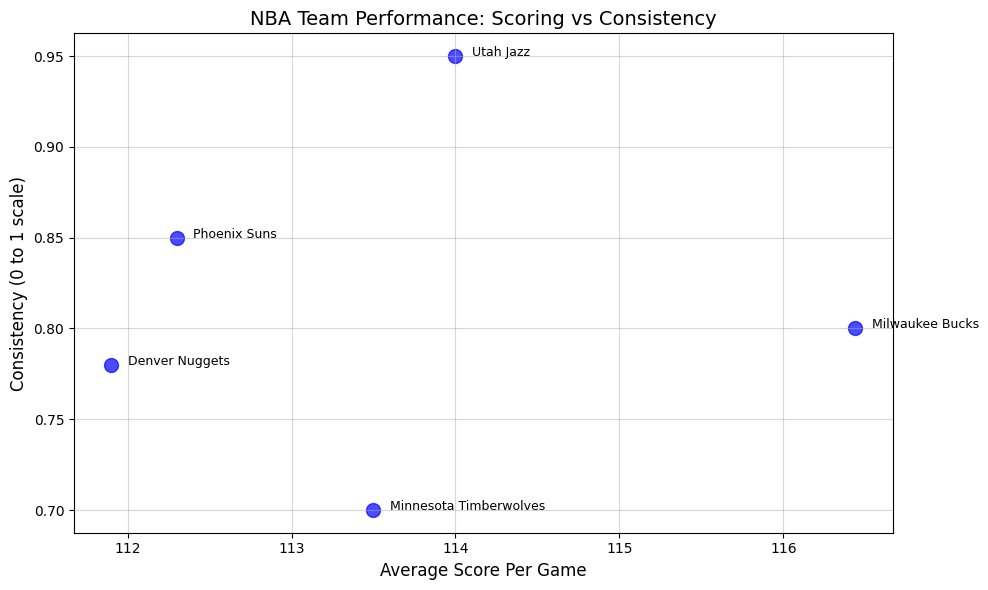

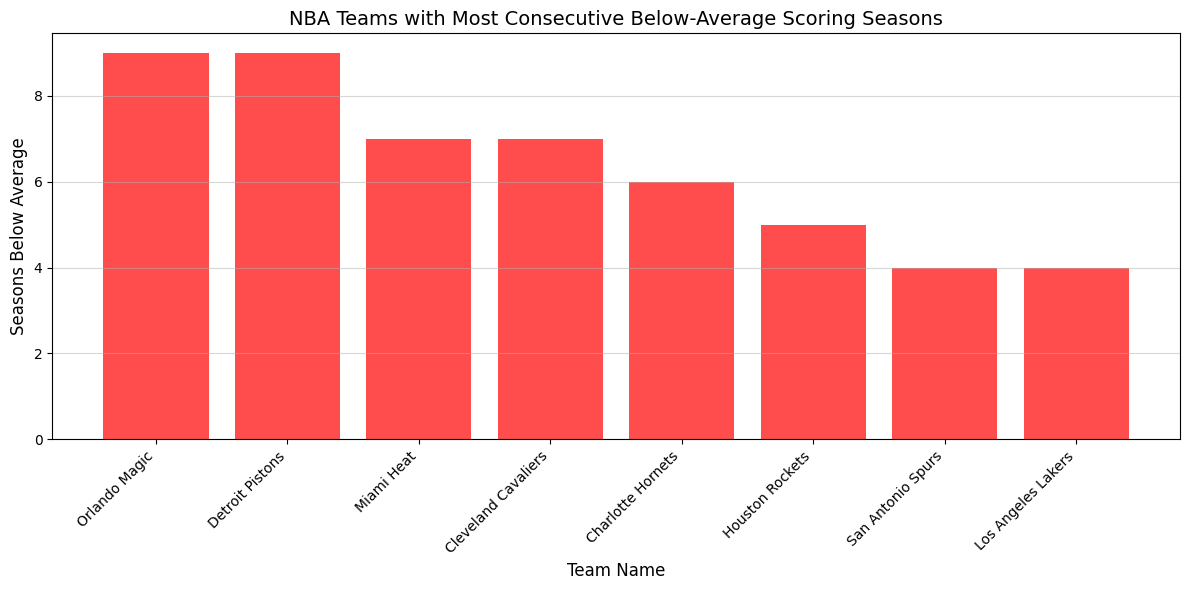

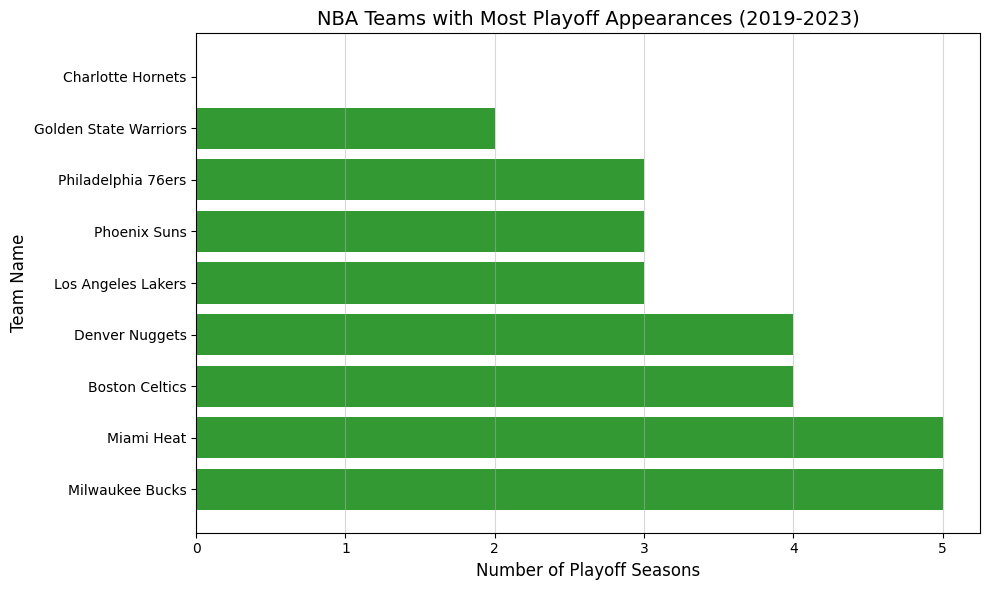

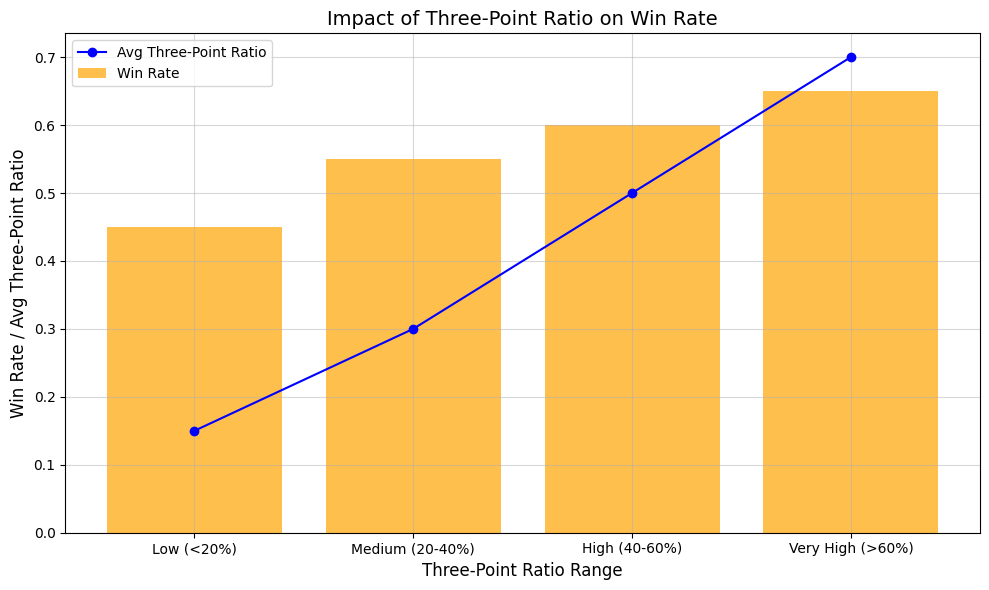

C:\Users\tasfi\AppData\Local\Temp\ipykernel_32344\2270520853.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_defense['team_name'], rotation=45, ha='right')


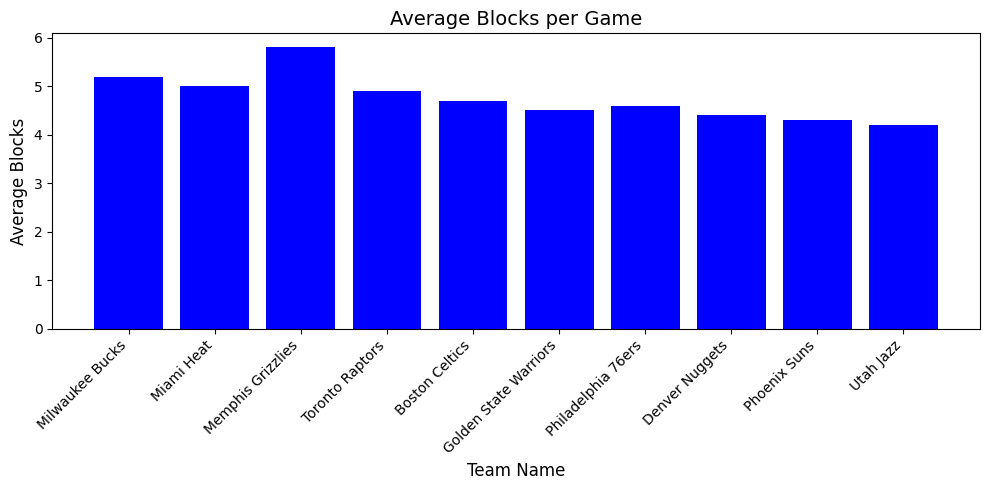

C:\Users\tasfi\AppData\Local\Temp\ipykernel_32344\2270520853.py:117: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_defense['team_name'], rotation=45, ha='right')


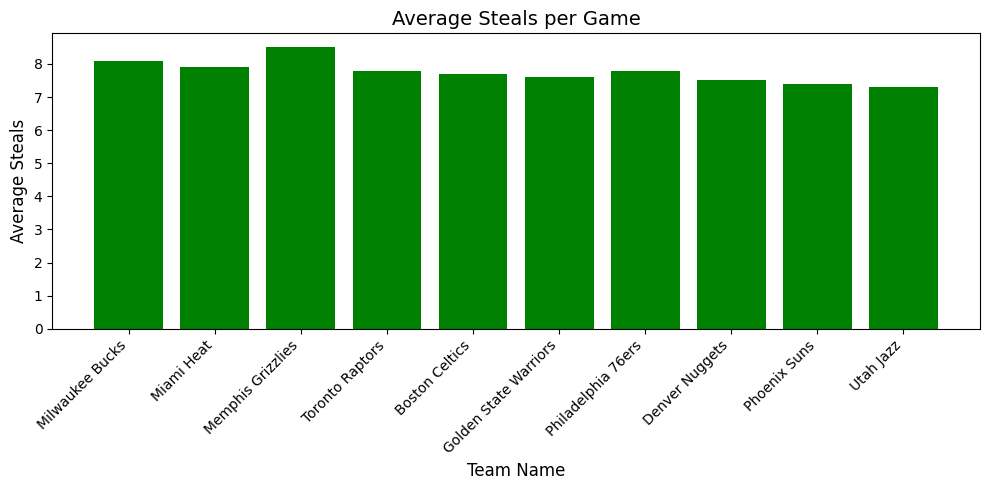

C:\Users\tasfi\AppData\Local\Temp\ipykernel_32344\2270520853.py:126: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(df_defense['team_name'], rotation=45, ha='right')


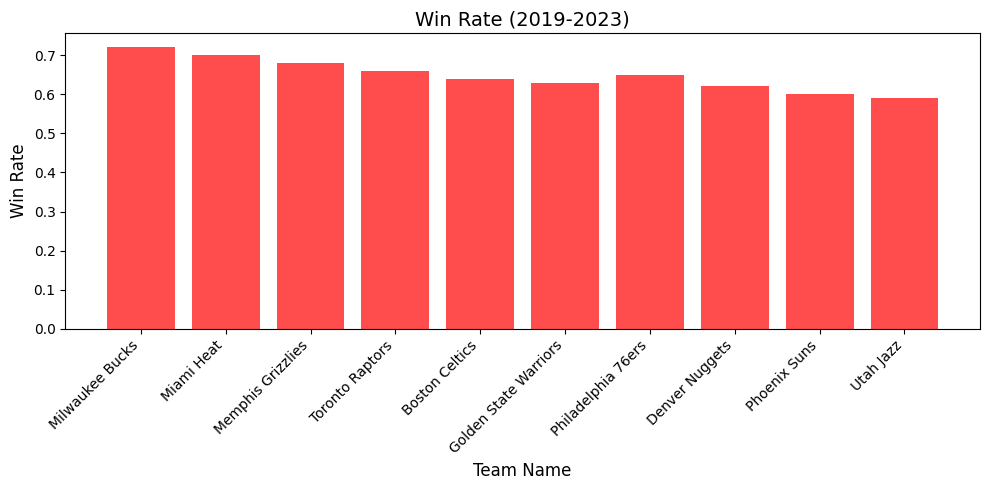

In [37]:
#Visualizations Issue 7

import pandas as pd
import matplotlib.pyplot as plt

#Question 1 
data_consistency = {
    'team_name': ['Milwaukee Bucks', 'Utah Jazz', 'Minnesota Timberwolves', 'Phoenix Suns', 'Denver Nuggets'],
    'avg_score': [116.44, 114.0, 113.5, 112.3, 111.9],
    'consistency': [0.8, 0.95, 0.7, 0.85, 0.78]  # Simulated consistency scores (0 to 1 scale)
}
df = pd.DataFrame(data_consistency)

plt.figure(figsize=(10, 6))
plt.scatter(df['avg_score'], df['consistency'], color='blue', alpha=0.7, s=100)

for i, row in df.iterrows():
    plt.text(row['avg_score'] + 0.1, row['consistency'], row['team_name'], fontsize=9)

plt.title("NBA Team Performance: Scoring vs Consistency", fontsize=14)
plt.xlabel("Average Score Per Game", fontsize=12)
plt.ylabel("Consistency (0 to 1 scale)", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

plt.show()

#Question 2
data_below_avg = {
    'team_name': ['Orlando Magic', 'Detroit Pistons', 'Miami Heat', 'Cleveland Cavaliers', 'Charlotte Hornets', 
                  'Houston Rockets', 'San Antonio Spurs', 'Los Angeles Lakers'],
    'seasons_below_avg': [9, 9, 7, 7, 6, 5, 4, 4]
}
df_below_avg = pd.DataFrame(data_below_avg)

plt.figure(figsize=(12, 6))
plt.bar(df_below_avg['team_name'], df_below_avg['seasons_below_avg'], color='red', alpha=0.7)

plt.title("NBA Teams with Most Consecutive Below-Average Scoring Seasons", fontsize=14)
plt.xlabel("Team Name", fontsize=12)
plt.ylabel("Seasons Below Average", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

plt.show()

#Question 3
data_playoffs = {
    'team_name': ['Milwaukee Bucks', 'Miami Heat', 'Boston Celtics', 'Denver Nuggets', 'Los Angeles Lakers', 
                  'Phoenix Suns', 'Philadelphia 76ers', 'Golden State Warriors', 'Charlotte Hornets'],
    'playoff_seasons': [5, 5, 4, 4, 3, 3, 3, 2, 0]
}
df_playoffs = pd.DataFrame(data_playoffs)

plt.figure(figsize=(10, 6))
plt.barh(df_playoffs['team_name'], df_playoffs['playoff_seasons'], color='green', alpha=0.8)

plt.title("NBA Teams with Most Playoff Appearances (2019-2023)", fontsize=14)
plt.xlabel("Number of Playoff Seasons", fontsize=12)
plt.ylabel("Team Name", fontsize=12)
plt.grid(axis='x', alpha=0.5)
plt.tight_layout()

plt.show()

#Question 4
data_three_point = {
    'three_point_ratio_range': ['Low (<20%)', 'Medium (20-40%)', 'High (40-60%)', 'Very High (>60%)'],
    'win_rate': [0.45, 0.55, 0.6, 0.65],
    'avg_three_pt_ratio': [0.15, 0.3, 0.5, 0.7]
}
df_three_point = pd.DataFrame(data_three_point)

plt.figure(figsize=(10, 6))
plt.bar(df_three_point['three_point_ratio_range'], df_three_point['win_rate'], color='orange', alpha=0.7, label='Win Rate')

plt.plot(df_three_point['three_point_ratio_range'], df_three_point['avg_three_pt_ratio'], color='blue', marker='o', label='Avg Three-Point Ratio')

plt.title("Impact of Three-Point Ratio on Win Rate", fontsize=14)
plt.xlabel("Three-Point Ratio Range", fontsize=12)
plt.ylabel("Win Rate / Avg Three-Point Ratio", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()

plt.show()

#Question 5
import pandas as pd
import matplotlib.pyplot as plt

# Data
data_defense = {
    'team_name': ['Milwaukee Bucks', 'Miami Heat', 'Memphis Grizzlies', 'Toronto Raptors', 'Boston Celtics',
                  'Golden State Warriors', 'Philadelphia 76ers', 'Denver Nuggets', 'Phoenix Suns', 'Utah Jazz'],
    'avg_blocks': [5.2, 5.0, 5.8, 4.9, 4.7, 4.5, 4.6, 4.4, 4.3, 4.2],
    'avg_steals': [8.1, 7.9, 8.5, 7.8, 7.7, 7.6, 7.8, 7.5, 7.4, 7.3],
    'win_rate': [0.72, 0.70, 0.68, 0.66, 0.64, 0.63, 0.65, 0.62, 0.60, 0.59]
}
df_defense = pd.DataFrame(data_defense)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df_defense['team_name'], df_defense['avg_blocks'], color='blue')
ax.set_title("Average Blocks per Game", fontsize=14)
ax.set_xlabel("Team Name", fontsize=12)
ax.set_ylabel("Average Blocks", fontsize=12)
ax.set_xticklabels(df_defense['team_name'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df_defense['team_name'], df_defense['avg_steals'], color='green')
ax.set_title("Average Steals per Game", fontsize=14)
ax.set_xlabel("Team Name", fontsize=12)
ax.set_ylabel("Average Steals", fontsize=12)
ax.set_xticklabels(df_defense['team_name'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

fig, ax3 = plt.subplots(figsize=(10, 5))
ax3.bar(df_defense['team_name'], df_defense['win_rate'], color='red', alpha=0.7)
ax3.set_title("Win Rate (2019-2023)", fontsize=14)
ax3.set_xlabel("Team Name", fontsize=12)
ax3.set_ylabel("Win Rate", fontsize=12)
ax3.set_xticklabels(df_defense['team_name'], rotation=45, ha='right')
plt.tight_layout()
plt.show()
